## Outlier Removal Using Z-score:

### Assumptions:

- The data is normally distributed.
- The data has no missing values.

<img src='images/normal.jpg' width='500'>

- Notes: 99% of data lies between (mean + 3 * std) and (mean - 3 * std) in a normal distribution.
- Notes: If standard Normal distribution if lies between -3 and 3, then it is within 3 standard deviations from the mean.

## Z-score formula:

<img src='images/z.jpg' width='300' height='210'>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('Datasets/weight-height.csv')

### Data Understanding:

In [28]:
df.sample(3)

,Gender,Height,Weight
2673,Male,71.878717,211.041211
844,Male,71.527048,202.748740
4648,Male,69.805581,208.435223


In [29]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

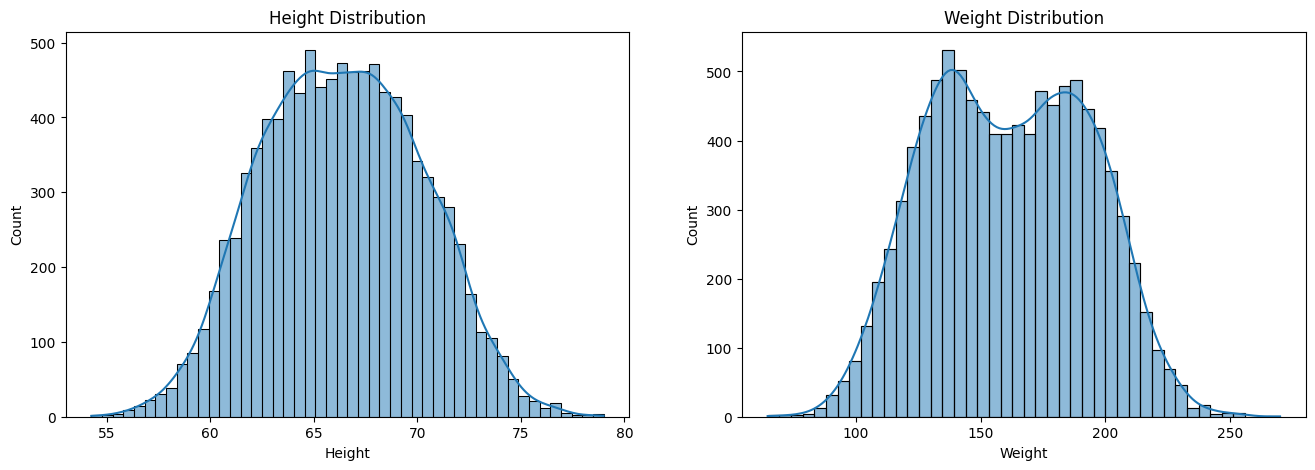

In [31]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(16,5))

sns.histplot(df['Height'],kde=True,ax=ax1)
ax1.set_title('Height Distribution')

sns.histplot(df['Weight'],kde=True,ax=ax2)
ax2.set_title('Weight Distribution')

plt.show()

In [32]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: ylabel='Height'>

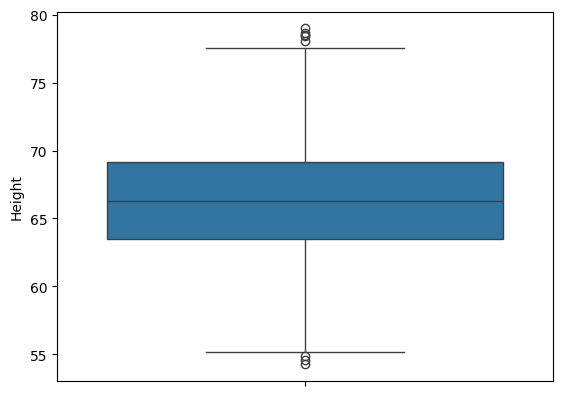

In [33]:
sns.boxplot(df['Height'])

## Approaches:

1. Direct Trimming
2. Z-Score Trimming
3. Z-Score Capping

In [ ]:
# Apporach 1st:

# Finding the boundary values

print("Highest Height",df['Height'].mean() + 3*df['Height'].std())
print("Lowest Height",df['Height'].mean() - 3*df['Height'].std())

Highest allowed 77.91014411714093
Lowest allowed 54.82497539250156


In [ ]:
# Finding the outliers

df[(df['Height'] > 77.91) | (df['Height'] < 54.82)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [37]:
df.shape

(10000, 3)

In [39]:
new_df = df[(df['Height'] < 77.91) & (df['Height'] > 54.82)]
new_df.shape

(9993, 3)

<Axes: ylabel='Height'>

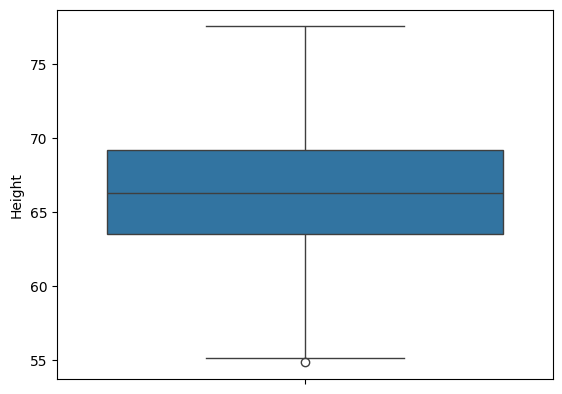

In [38]:
sns.boxplot(new_df['Height'])

## Approach 2nd: Z-score trimming

1. Convert the data to z-scores using the formula: z = (x - μ) / σ, (Normal to Standard Normal Distribution)
2. Then remove the values below -3 and above 3 from the Standard Normal distribution.

In [40]:
df.sample(3)

,Gender,Height,Weight
2958,Male,71.773744,200.129819
5077,Female,65.528856,138.989536
5910,Female,63.989692,141.487753


In [47]:
df['z-Height'] = (df['Height'] - df['Height'].mean()) / df['Height'].std()

In [48]:
df.sample()

,Gender,Height,Weight,z-Height
9576,Female,66.315715,163.481937,-0.013475


In [49]:
df[df['z-Height'] > 3]

,Gender,Height,Weight,z-Height
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [53]:
new_df1 = df[(df['z-Height'] < 3) & (df['z-Height'] > -3)]
new_df1.shape

(9993, 4)

## Appraoch 3: Z-score capping

1. Find out the upper limit and lower limit of 3 standard deviations from the mean of the Z-scored data.
2. Replace all Z-scores that are above the upper limit with the upper limit and all Z-scores that are below the lower limit with the lower limit.


In [55]:
df.shape

(10000, 4)

In [56]:
upper_limit = df['Height'].mean() + 3*df['Height'].std()
lower_limit = df['Height'].mean() - 3*df['Height'].std()

In [58]:
print(upper_limit,lower_limit)

77.91014411714093 54.82497539250156


In [59]:
def replace_outliers(data):
    if data > upper_limit:
        return upper_limit
    if data < lower_limit:
        return lower_limit
    else:
        return data

In [60]:
df['z-Height-cap'] = df['Height'].apply(replace_outliers)

In [61]:
df.sample(3)

,Gender,Height,Weight,z-Height,z-Height-cap
1497,Male,69.750032,204.179761,0.879129,69.750032
8649,Female,63.495303,141.026405,-0.746520,63.495303
3520,Male,71.154576,194.383011,1.244180,71.154576


In [62]:
df.shape

(10000, 5)

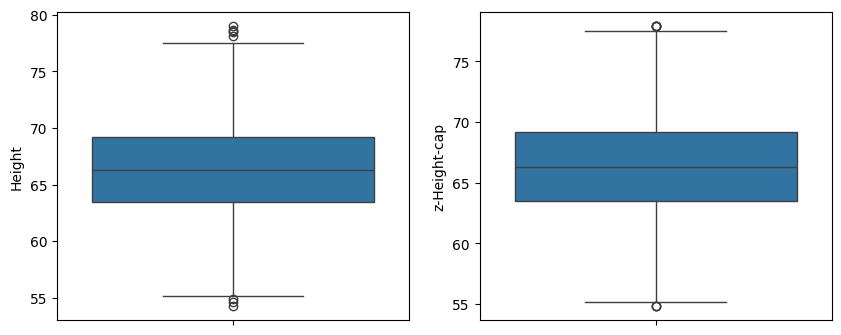

In [69]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))
sns.boxplot(df['Height'],ax=ax1)
sns.boxplot(df['z-Height-cap'],ax=ax2)
plt.show()

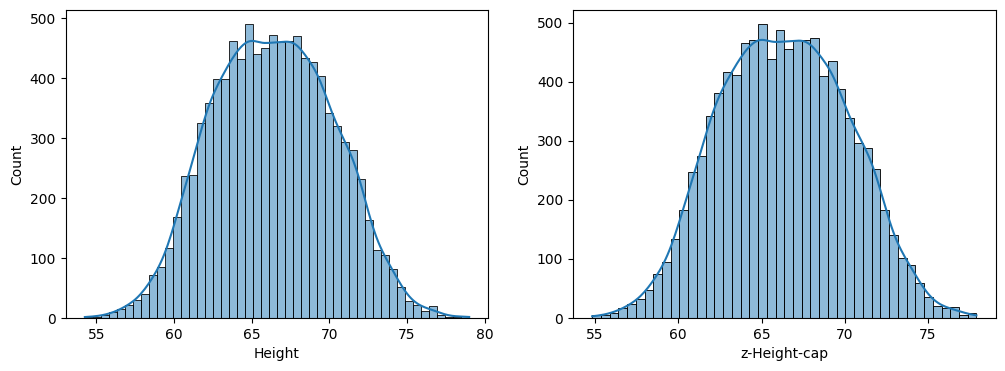

In [68]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,4))
sns.histplot(df['Height'],kde=True,ax=ax1)
sns.histplot(df['z-Height-cap'],kde=True,ax=ax2)
plt.show()